In [8]:
import pandas as pd  
import numpy as np 
from matplotlib import pyplot as plt
from preprocessing.wrangling import get_indi_df


list_dir = 'data_collection/stocks_list'
list_prefix = "ind_nifty"
list_suffix = "list.csv"
save_dir = 'data_collection/ohlcv_data'
save_prefix = "ohlcv_"
save_suffix = ".csv"
results_file = 'results/all_stock_wavelet_rfg.csv'
start_date = "2017-01-01"
end_date = None

stocks, volatility = [], [] 

for f in os.listdir(list_dir):
    if f.startswith(list_prefix) and f.endswith(list_suffix):
        savefile = os.path.join(save_dir, save_prefix+f[9:-8]+save_suffix)
        listfile = os.path.join(list_dir, f)
        p = pd.read_csv(listfile)
        symbols = list(p['Symbol'].values + '.NS')
        for symbol in symbols:
            # end_date_str = end_date if end_date is not None else 'full'
            # comment = comment + symbol + '_' + start_date + '_' + end_date_str + '_' + 'wl' + str(len_window) + '_' + 'tr' + str(n_tr) + '_' + 'ts' + str(n_ts)
            df = get_indi_df(symbol, ohlcvfile=savefile, start_date=start_date)
            stocks.append(symbol)
            volatility.append(np.square(df['Close'].diff()).mean())

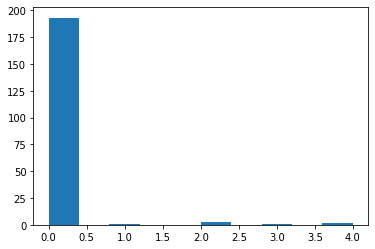

[[6.68356326e+02]
 [1.28791704e+06]
 [4.35582907e+04]
 [9.72006432e+04]
 [2.01705801e+04]]


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(np.array(volatility).reshape(-1, 1))
plt.hist(kmeans.predict(np.array(volatility).reshape(-1, 1)))
plt.show()
print(kmeans.cluster_centers_)


In [21]:
pd.Series(kmeans.predict(np.array(volatility).reshape(-1, 1))).value_counts()

0    193
2      3
4      2
3      1
1      1
dtype: int64